In [1]:
using CSV
using DataFrames
using Distances
using PyPlot

In [128]:
flux = CSV.read("../../scraping/scraped_data/city_to_city/lefigaro.csv", delim=",");
villes = CSV.read("../../data/villes/villes_v2.csv");
villes = villes[1:end-1,:]; # on enlève Neuilly
names(flux)

44-element Array{Symbol,1}:
 :id           
 :A            
 :B            
 Symbol("1900")
 Symbol("1901")
 Symbol("1902")
 Symbol("1903")
 Symbol("1904")
 Symbol("1905")
 Symbol("1906")
 Symbol("1907")
 Symbol("1908")
 Symbol("1909")
 ⋮             
 Symbol("1929")
 Symbol("1930")
 Symbol("1931")
 Symbol("1932")
 Symbol("1933")
 Symbol("1934")
 Symbol("1935")
 Symbol("1936")
 Symbol("1937")
 Symbol("1938")
 Symbol("1939")
 Symbol("1940")

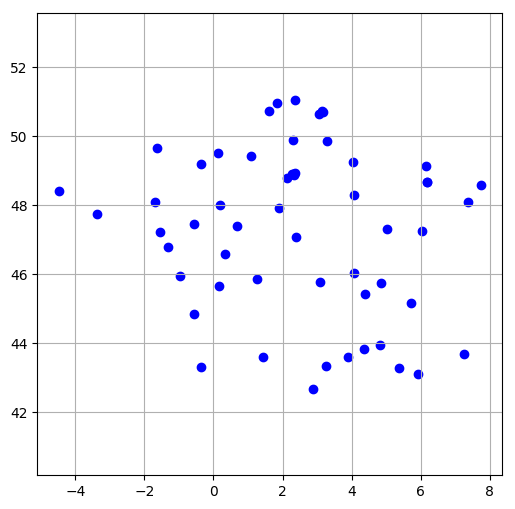

In [83]:
fig = PyPlot.figure(1,figsize=(6,6))
PyPlot.scatter(villes.lon, villes.lat, color="b")
PyPlot.axis("equal")
PyPlot.grid()

In [151]:
id_ref = 1 # ville de référence, ici Paris
villes.dist_ref_hav = 0.0
villes.dist_ref_euc = 0.0
villes.degres_to_ref = 0.0
for i in range(1,size(villes,1))
     villes.dist_ref_hav[i] = evaluate(Haversine(6371.0),
        (villes.lon[i],villes.lat[i]),
        (villes.lon[id_ref],villes.lat[id_ref]))
    A = [villes.lon[i], villes.lat[i]]
    B = [villes.lon[id_ref], villes.lat[id_ref]]
    villes.dist_ref_euc[i] = sqrt(sum((A-B).^2))
    for id_flux in range(1,size(flux,1))
        if (flux.A[id_flux] == villes.id[i] && flux.B[id_flux] == villes.id[id_ref]) ||
            (flux.A[id_flux] == villes.id[id_ref] && flux.B[id_flux] == villes.id[i])
            #villes.degres_to_ref[i] = sum(flux[id_flux,1900-1896:1913-1896])
            villes.degres_to_ref[i] = sum(flux[id_flux,1919-1896:1928-1896])
        end
    end
end
last(villes,5)

5×11 DataFrame. Omitted printing of 5 columns
│ Row │ id     │ name       │ pop     │ lon       │ lat      │ dist_ref_hav │
│     │ Int64⍰ │ String⍰    │ Int64⍰  │ Float64⍰  │ Float64⍰ │ Float64      │
├─────┼────────┼────────────┼─────────┼───────────┼──────────┼──────────────┤
│ 1   │ 52     │ STRASBOURG │ missing │ 7.75      │ 48.5833  │ 397.644      │
│ 2   │ 53     │ COLMAR     │ missing │ 7.36667   │ 48.0833  │ 380.106      │
│ 3   │ 54     │ NANCY      │ missing │ 6.2       │ 48.6833  │ 283.203      │
│ 4   │ 55     │ CLICHY     │ 33895   │ 2.3       │ 48.9     │ 5.50893      │
│ 5   │ 56     │ PAU        │ 33012   │ -0.366667 │ 43.3     │ 652.536      │

In [152]:
ref_degres = maximum(villes.degres_to_ref);
ref_dist = villes.dist_ref_euc[villes.degres_to_ref .== ref_degres];

id_max_degres = -1
for i in range(1,size(villes,1))
    if villes.degres_to_ref[i] == ref_degres
        id_max_degres = i
        break
    end
end
print(villes.name[id_max_degres])

villes.dist_rel_euc = villes.dist_ref_euc.*villes.degres_to_ref./ref_degres;
#villes.dist_rel_euc = villes.dist_ref_euc.*0.2;
villes.lon_rel = (villes.lon.-villes.lon[id_ref]).*villes.dist_rel_euc./villes.dist_ref_euc.+villes.lon[id_ref];
villes.lat_rel = (villes.lat.-villes.lat[id_ref]).*villes.dist_rel_euc./villes.dist_ref_euc.+villes.lat[id_ref];

first(villes,6)

GRENOBLE

6×11 DataFrame. Omitted printing of 5 columns
│ Row │ id     │ name      │ pop     │ lon       │ lat      │ dist_ref_hav │
│     │ Int64⍰ │ String⍰   │ Int64⍰  │ Float64⍰  │ Float64⍰ │ Float64      │
├─────┼────────┼───────────┼─────────┼───────────┼──────────┼──────────────┤
│ 1   │ 1      │ PARIS     │ 2536834 │ 2.34445   │ 48.86    │ 0.0          │
│ 2   │ 2      │ LYON      │ 466028  │ 4.84139   │ 45.7589  │ 392.815      │
│ 3   │ 3      │ MARSEILLE │ 442239  │ 5.37639   │ 43.2967  │ 661.198      │
│ 4   │ 4      │ BORDEAUX  │ 256906  │ -0.566667 │ 44.8333  │ 499.4        │
│ 5   │ 5      │ LILLE     │ 216276  │ 3.06667   │ 50.6333  │ 203.893      │
│ 6   │ 6      │ TOULOUSE  │ 149963  │ 1.43333   │ 43.6     │ 589.057      │

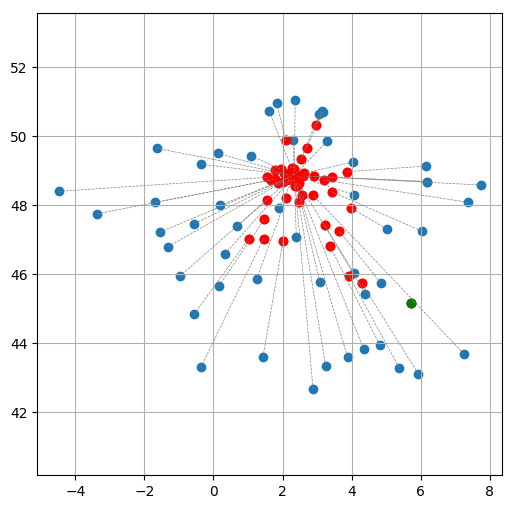

In [153]:
fig = PyPlot.figure(1,figsize=(6,6))
PyPlot.scatter(villes.lon, villes.lat)
PyPlot.scatter(villes.lon_rel, villes.lat_rel, color="r")
PyPlot.scatter(villes.lon_rel, villes.lat_rel, color="r")
PyPlot.scatter(villes.lon_rel[id_max_degres], villes.lat_rel[id_max_degres], color="g")

for i in range(1,size(villes,1))
    #PyPlot.annotate(s=villes.name[i], xy = (villes.lon_rel[i], villes.lat_rel[i]))
    PyPlot.plot([villes.lon[i], villes.lon_rel[i]],[villes.lat[i], villes.lat_rel[i]], color="grey", ls="--", lw=0.5)
end
PyPlot.axis("equal")
PyPlot.grid()
PyPlot.show()
PyPlot.savefig("rel_dist_to_Paris_3.png")

GRENOBLE